# micrograd exercises

1. watch the [micrograd video](https://www.youtube.com/watch?v=VMj-3S1tku0) on YouTube
2. come back and complete these exercises to level up :)

## section 1: derivatives

### A mathematical expression

Detour: python functions, lambdas, and uses of last expression in a cell

```python   

In [9]:
# here is a mathematical expression that takes 3 inputs and produces one output
from math import sin, cos

def f(a, b, c): 
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

f_as_lambda = lambda a, b, c: -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5 # lambda limited to single expression which is returned 

f(2, 3, 4) , f_as_lambda(2, 3, 4) , f(2, 3, 4) == f_as_lambda(2, 3, 4) , (lambda a: a)(2)

(6.336362190988558, 6.336362190988558, True, 2)

### Derivative of $f(a,b,c) = -a^3 +sin(3*b) -1.0/c + b^{2.5} - \sqrt a$  analytically

- write the function df that returns the analytical gradient of f
- i.e. use your skills from calculus to take the derivative, then implement the formula
- if you do not calculus then feel free to ask [wolframalpha](https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29)


In [5]:
def dfda(a):
  return -3*a**2 - 0.5*a**(-0.5) 

def dfdb(b):
  return 3*cos(3*b) + 2.5*b**1.5 

def dfdc(c):
  return 1.0/c**2

def df(a,b,c):
  return [dfda(a), dfdb(b), dfdc(c)]

def gradf(a, b, c):
  return df(a,b,c)
  # return [0, 0, 0] # todo, return [df/da, df/db, df/dc]

# expected answer is the list of
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
analytic_grad = yours
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


### Derivative of $f(a,b,c) = -a^3 +sin(3*b) -1.0/c  + b^{2.5} - a^{.5}$  numerically

- now estimate the gradient numerically without any calculus, using
- the approximation we used in the video.

- you should not call the function df from the last cell

In [6]:
def grad_by_delta(a, b, c):
  h = 1e-6
  v = f(a,b,c)
  return [(f(a+h, b, c) - v) / h,
          (f(a, b+h, c) - v) / h,
          (f(a, b, c+h) - v) / h]

# -----------
numerical_grad = grad_by_delta(2, 3, 4)
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353559348809995
OK for dim 1: expected 10.25699027111255, yours returns 10.256991666679482
OK for dim 2: expected 0.0625, yours returns 0.062499984743169534


### Symmetric Derivative
- there is an alternative formula that provides a much better numerical
- approximation to the derivative of a function.
- learn about it here: [Symmetric_derivative](https://en.wikipedia.org/wiki/Symmetric_derivative)
- implement it. confirm that for the same step size h this version gives a  
- better approximation.

-  Detour: tabulate , *args, walrus operator, pandas styling

In [7]:
def symmetric_grad(a, b, c):
  h = 1e-6
  return [(f(a+h, b, c) - f(a-h, b, c)) / (2*h),
          (f(a, b+h, c) - f(a, b-h, c)) / (2*h),
          (f(a, b, c+h) - f(a, b, c-h)) / (2*h)]  

# -----------
numerical_grad2 = symmetric_grad(2, 3, 4)
# -----------

display(HTML('<hr><h2>Results</h2>'))
for dim in range(3):
  ok = 'OK' if abs(numerical_grad2[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad2[dim]}")

#~~~~~~~~~~~~~~~
display(HTML('<hr><h2>Tabulating Partials - using tabulate</h2>'))
# tablulate the results of the 3 methods
from tabulate import tabulate
print(tabulate([['analytic_grad', *analytic_grad],  # *list unpacks the list into individual elements - splat operator ; ** unpacks a dictionary
                ['grad_by_delta', *numerical_grad],
                ['symmetric_grad', *numerical_grad2]],
               headers=['method', 'df/da', 'df/db', 'df/dc']))  

display(HTML('<h3>Tabulating Errors ( actual - expected)</h3>'))
# tablulate the differences from the analytic solution
print(tabulate([['grad_by_delta', *[(a - b) for a, b in zip(numerical_grad, ans)]],
                ['symmetric_grad', *[(a - b) for a, b in zip(numerical_grad2, ans)]]],
               headers=['method', 'df/da', 'df/db', 'df/dc']))
#~~~~~~~~~~~~~~~
display(HTML('<hr><h2>Tabulating Partials - using pandas</h2>'))
import pandas as pd
display(pd.DataFrame([['analytic_grad', *analytic_grad],
                ['grad_by_delta', *numerical_grad],
                ['symmetric_grad', *numerical_grad2]],
               columns=['method', 'df/da', 'df/db', 'df/dc']))

display(HTML('<h3>Tabulating Errors ( actual - expected)</h3>'))
# tablulate the differences from the analytic solution
display(
  (df:=pd.DataFrame([['grad_by_delta', *[(a - b) for a, b in zip(numerical_grad, ans)]],
                ['symmetric_grad', *[(a - b) for a, b in zip(numerical_grad2, ans)]]],
               columns=['method', 'df/da', 'df/db', 'df/dc'])).set_index('method'),

  df.style.map(
    lambda x: 'color: red' if abs(x) > 1e-5 else 'color: green' ,
    subset=pd.IndexSlice[:, df.select_dtypes(include='number').columns]
  )
)


NameError: name 'HTML' is not defined

## section 2: support for softmax

### The Value class

In [742]:
# Value class starter code, with many functions taken out
from math import exp, log

class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label 

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other): # exactly as in the video
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    out.label1 = f'({self.label} \n+ {other.label})'

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out
  
  def __radd__(self, other): # other + self
    return self + other
  
  # ------
  # re-implement all the other functions needed for the exercises below
  # your code here
  def __mul__(self, other): # self * other
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    out.label1 = f'({self.label} * {other.label})'

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other
  
  def log(self):
    out = Value(log(self.data), (self,), 'log')
    out.label1 = f'log({self.label})'

    def _backward():
      self.grad += 1.0 / self.data * out.grad
    out._backward = _backward

    return out
  
  def exp(self):
    out = Value(exp(self.data), (self,), 'exp')
    out.label1 = f'exp({self.label})' 

    def _backward():
      self.grad += exp(self.data) * out.grad
    out._backward = _backward

    return out
  
  def __neg__(self):
    # return self * -1.0
    out = Value(-self.data, (self,), 'neg', f'-{self.label}' if self.label else '')
    out.label1 = f'-{self.label}'

    def _backward():
      self.grad += -1.0 * out.grad
    out._backward = _backward

    return out
  
  def __sub__(self, other):
    return self + (-other)

  def __pow__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data ** other.data, (self, other), '**')
    out.label1 = f'({self.label} ** {other.label})'

    def _backward():
      self.grad += other.data * self.data ** (other.data - 1) * out.grad
      other.grad += self.data ** other.data * log(self.data) * out.grad
    out._backward = _backward

    return out
  
  def __truediv__(self, other): # self / other
    return self * other**-1
  
  def __rtruediv__(self, other): # other / self
    return other * self**-1
  
  def relu(self):
    out = Value(max(0, self.data), (self,), 'relu')
    out.label1 = f'relu({self.label})'

    def _backward():
      self.grad += (self.data > 0) * out.grad
    out._backward = _backward

    return out

  
  # --------
  def backward(self): # exactly as in video
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for ix, node in enumerate(reversed(topo)):
      node._bprop_seq = ix
      node._backward()

  
  # some tricks
  def _backward_dbg(self): # added for debugging - to see if a Node gets traversed multiple times as in b = a+a 
    if '_brops' not in self.__dict__:
      self._bprops = 0
    self._bprops += 1
    self._backward()

  def backward_dbg(self):
    self.backward()
    return self

### Visualize an expression of Values
- Draw the graph of Values in an expression - displaying data, grad**∇** and backprop_order**°**
- This uses GraphViz *TODO: Create Animation using Manim*
  
- Detour: Shoving methods into the class whose source code you cannot see

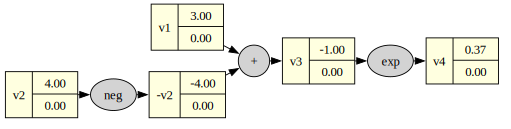

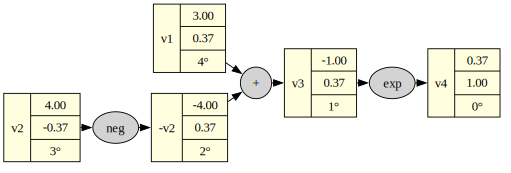

In [743]:
from graphviz import Digraph

def draw_dot(root, sz=7):
  dot = Digraph()
  dot.attr(rankdir= ['LR', 'TB'][0], size=f'{sz}', nodesep='0.3', ranksep='0.2', margin='0.1')

  def build_dot(v):
    # dot.node(str(id(v)), label= '{'+f"{v.label}|{{{v.data:.02f}|{v.grad:.02f}|{v._bprop_seq}}}" +'}', shape='record', style='filled', fillcolor='lightyellow' if v.label else 'white')
    dot.node(str(id(v)), 
             label= 
            #  f"{{{v.label} | {v._bprop_seq}°}}|{{{v.data:.02f}| {v.grad:.02f}∇ }}"  if hasattr(v, '_bprop_seq') else 
             f"{{{v.label}|{{{v.data:.02f}|{v.grad:.02f}∇|{v._bprop_seq}°}}}}"  if hasattr(v, '_bprop_seq') else 
             f"{{{v.label}|{{{v.data:.02f}|{v.grad:.02f}∇}}}}",
             shape='record', style='filled', fillcolor='lightyellow' if v.label else 'white')
    # dot.node(str(id(v)), label= '{'+f"{v.label}|{{{v.data:.02f}|{v.grad:.02f}}}" +'}', shape='record')
    if v._prev:
      o = v._op
      dot.node(str(id(v))+"_op", f"{o}", width=f'{.1*len(o)}', height=f'{.1*len(o)}', style='filled', fill='lightgrey')  
      dot.edge(str(id(v))+"_op", str(id(v)))
    for child in v._prev:
      dot.edge(str(id(child)), str(id(v))+"_op")
      build_dot(child)

  build_dot(root)
  return dot

# add the draw_dot method to the Value class
Value.draw_dot = draw_dot

#---

from IPython.display import display, HTML
def test_draw_dot(bakprop=True): 
    v1 , v2 = Value(3, label='v1'), Value(4, label='v2')
    v3 = v1 + -v2 ; v3.label = 'v3'
    v4 = v3.exp() ; v4.label = 'v4'
    if bakprop: v4.backward()
    return v4.draw_dot()
    # return draw_dot(v4)

display(
  HTML("<h3>Forward pass</h3>")
  ,test_draw_dot(not True), HTML("<hr>")
  ,HTML("<h3>Backward pass with grads∇ , order°</h3>")
  ,test_draw_dot() 
)

### Negative log likelihood loss function using __Value__ (_micrograd_)

- without referencing our code/video __too__ much, make this cell work
- you'll have to implement (in some cases re-implemented) a number of functions
- of the Value object, similar to what we've seen in the video.
- instead of the squared error loss this implements the negative log likelihood
- loss, which is very often used in classification.
  
- $softmax(x) = \frac{e^{x_i}}{\sum_j e^{x_j}}$

2.1755153626167147
OK for dim 0: expected 0.041772570515350445, yours returns 0.041772570515350445
OK for dim 1: expected 0.8390245074625319, yours returns 0.8390245074625319
OK for dim 2: expected 0.005653302662216329, yours returns 0.005653302662216329
OK for dim 3: expected -0.8864503806400986, yours returns -0.8864503806400986


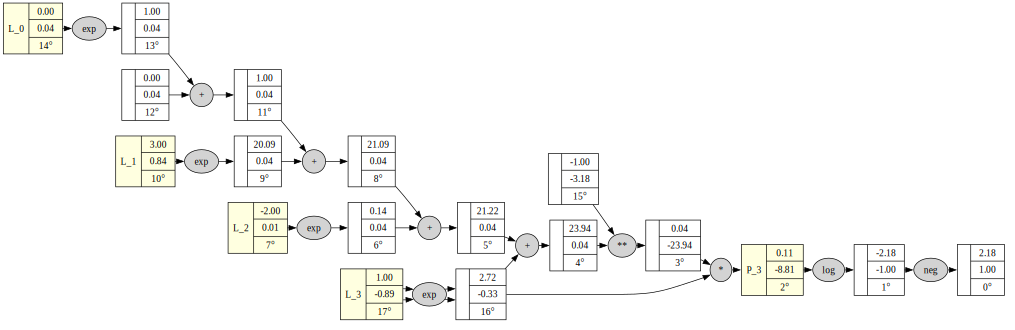

In [744]:
# this is the softmax function
# https://en.wikipedia.org/wiki/Softmax_function
def softmax(logits):
  counts = [logit.exp() for logit in logits]
  denominator = sum(counts)
  out = [c / denominator for c in counts]
  return out

# this is the negative log likelihood loss function, pervasive in classification
logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]; 
for ix, l in enumerate(logits) : l.label = f'L_{ix}' # for debugging
probs = softmax(logits)
for ix, p in enumerate(probs) : p.label = f'P_{ix}' # for debugging
loss = -probs[3].log() # dim 3 acts as the label for this input example
loss.backward()
print(loss.data)

#--- expected answer is the list of
ans = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
#---
for dim in range(4):
  ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")

draw_dot(loss,sz=14)


### Negative log likelihood loss function using __PyTorch__

- Detour : functions as arguments , f string formatters

In [745]:
# verify the gradient using the torch library
# torch should give you the exact same gradient
import torch

def torch_grad(*kwargs):
    logits = torch.tensor(kwargs, requires_grad=True)
    probs = torch.softmax(logits, dim=0)
    loss = -torch.log(probs[3])
    loss.backward()
    return logits.grad
    
def torch_grad1(*kwargs):
    logits = [ torch.tensor(v, requires_grad=True) for v in kwargs]
    # print([l.shape for l in logits], torch.stack(logits).shape)
    probs = torch.softmax(torch.stack(logits), dim=0)
    # print(probs)
    loss = -torch.log(probs[3])
    loss.backward()
    return [l.grad.item() for l in logits]

def test_torch_grad(fn):
    print(f'Testing {fn.__name__}')
    inputs = [0.0, 3.0, -2.0, 1.0]
    expecteds = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
    actuals = fn(*inputs)
    for actual, expected in zip( actuals, expecteds) :
        print(f'\t{"OK" if abs(actual - expected) < 1e-5 else "WRONG!"} expected {expected:.12f}, yours returns {actual:.12f}')

test_torch_grad(torch_grad)
test_torch_grad(torch_grad1)


Testing torch_grad
	OK expected 0.041772570515, yours returns 0.041772566736
	OK expected 0.839024507463, yours returns 0.839024484158
	OK expected 0.005653302662, yours returns 0.005653302651
	OK expected -0.886450380640, yours returns -0.886450409889
Testing torch_grad1
	OK expected 0.041772570515, yours returns 0.041772566736
	OK expected 0.839024507463, yours returns 0.839024484158
	OK expected 0.005653302662, yours returns 0.005653302651
	OK expected -0.886450380640, yours returns -0.886450409889


## Neuron, Layer and MLP

Detour: Using the `__call__` method to make a class callable - for forward pass in this case


In [2]:
import random

class Module:

    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0

    def parameters(self):
        return []

class Neuron(Module):

    def __init__(self, nin, nonlin=True):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(0)
        self.nonlin = nonlin

    def __call__(self, x):
        act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        return act.relu() if self.nonlin else act

    def parameters(self):
        return self.w + [self.b]

    def __repr__(self):
        return f"{'ReLU' if self.nonlin else 'Linear'}Neuron({len(self.w)})"

class Layer(Module):

    def __init__(self, nin, nout, **kwargs):
        self.neurons = [Neuron(nin, **kwargs) for _ in range(nout)]

    def __call__(self, x):
        out = [n(x) for n in self.neurons]
        return out[0] if len(out) == 1 else out

    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]

    def __repr__(self):
        return f"Layer of [{', '.join(str(n) for n in self.neurons)}]"

class MLP(Module):

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1], nonlin=i!=len(nouts)-1) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

    def __repr__(self):
        return f"MLP of [{', '.join(str(layer) for layer in self.layers)}]"

In [8]:
MLP(3, [4, 2, 1])

NameError: name 'Value' is not defined

## Misc - Graphviz graphs , Manim animation ideas

- Zero grad
- Manin teaser
- Mathjax teaser

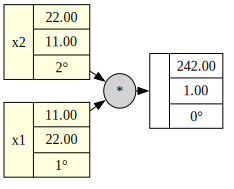

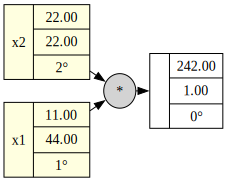

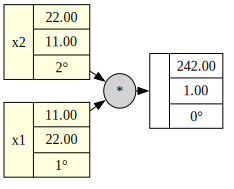

In [747]:
x1 =Value(11, label='x1')
x2 =Value(22, label='x2')
y = x1*x2 
display(y.backward_dbg().draw_dot())

display(HTML('<hr><h2 style="color:red">  Bug - Grads accumulate ; No Zero Grad</h2>'))
# y.zero_grad()
y = x1 * x2
display(y.backward_dbg().draw_dot())

display(HTML('<hr><h2 style="color:green">  Fixed - Grads accumulate ; Zero Grad</h2>'))
def zg(v):
    for c in v._prev:
        if hasattr(c, 'grad'):
            c.grad = 0
        zg(c)
    return v

display(zg(y).backward_dbg().draw_dot())


In [748]:
from manim import *
import numpy as np
import re
from manim.utils.color import rgb_to_color

In [749]:
%%manim -v WARNING --disable_caching -ql -r 400,400 -o 01_LLMAnim LLMAnim

class LLMAnim(Scene):
    def construct(self):
        NeuronsPerLayer = [4, 3, 3]

        # Print the screen dimensions
        width = self.camera.frame_width
        height = self.camera.frame_height
        # print(f"Width: {width}, Height: {height}")

        # Place the neurons in the layers as a circle
        layers = []
        neurons = []
        start_offset = np.array([-(self.camera.frame_width / 2)*.6, .8*(self.camera.frame_height / 2), 0])
        for i, n in enumerate(NeuronsPerLayer):
            layer = []
            for j in range(n):
                neuron = Circle(radius=.5, color=[BLUE, GREEN, RED][i%3] , fill_opacity=.5)
                self.play(Create(neuron), run_time=.5)
                self.play(neuron.animate.move_to(start_offset + 1*(i*4*RIGHT + j*3*DOWN)), run_time=.5)

        self


$$ 
\begin{align*} 
\text{Euler's Formula:} \quad e^{i\pi} + 1 &= 0 \\ 
\text{Quadratic Formula:} \quad x &= \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} \\ 
\text{Integral:} \quad \int_{a}^{b} f(x) \, dx &= F(b) - F(a) \\ 
\text{Summation:} \quad \sum_{n=1}^{\infty} \frac{1}{n^2} &= \frac{\pi^2}{6} \\ 
\text{Matrix:} \quad \mathbf{A} &= \begin{pmatrix} a & b \\ c & d \end{pmatrix} 
\end{align*} 
$$